In [44]:
import gym

In [45]:
env_name = 'CartPole-v0'
env = gym.make(env_name)

#### env成员变量
环境定义了动作空间和状态空间


In [26]:
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v0>>>>>

In [27]:
env.action_space

Discrete(2)

In [28]:
env.action_space.sample()

1

In [29]:
env.observation_space
env.observation_space.low
env.observation_space.high
env.observation_space.sample()

array([ 1.6194583e+00, -2.9336788e+38,  2.6264152e-01, -7.7780267e+37],
      dtype=float32)

#### action和env交互实例

In [31]:
??env.step

Signature: env.step(action)
Docstring:
Steps through the environment and if the number of steps elapsed exceeds ``max_episode_steps`` then truncate.

Args:
    action: The environment step action

Returns:
    The environment step ``(observation, reward, terminated, truncated, info)`` with `truncated=True`
    if the number of steps elapsed >= max episode steps
File:      e:\anaconda3\envs\ai_lab\lib\site-packages\gym\wrappers\time_limit.py
Type:      method

In [37]:
done = False
score = 0
state = env.reset()

while not done:
    env.render()
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    score += reward
    if terminated or truncated:
        done = True
        state = env.reset()
        
print('Total reward Score:', score)
env.close()


Total reward Score: 37.0


In [50]:
for epoch in range(1, 5+1):
    done = False
    score = 0
    state = env.reset()
    while not done:
        env.render()
        action = env.action_space.sample()
        # 关键就在此处，后续可以引进神经网络来预测action！！！
        # 这里我们每次只是随机取了一个action
        observation, reward, terminated, truncated, info = env.step(action)
        score += reward
        if terminated or truncated:
            done = True
            state = env.reset()
    print(f'Epoch: {epoch}, Total reward Score:', score)

Epoch: 1, Total reward Score: 11.0
Epoch: 2, Total reward Score: 13.0
Epoch: 3, Total reward Score: 17.0
Epoch: 4, Total reward Score: 32.0
Epoch: 5, Total reward Score: 16.0


In [76]:
import gym
import time

env_name = 'CartPole-v0'
env = gym.make(env_name, render_mode='rgb_array')
state = env.reset()

In [77]:
total_reward = 0
done = False
frames = []
while not done:
    frames.append(env.render())
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    score += reward
    if terminated or truncated:
        done = True
        state = env.reset()
    time.sleep(0.2)
env.close()
print('Total reward Score:', score)

e:\anaconda3\envs\ai_lab\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Total reward Score: 63.0


In [78]:
print(len(frames),frames[0].shape)

22 (400, 600, 3)


In [79]:
import matplotlib.pyplot as plt
from matplotlib import animation

In [82]:
def display_frames2video(frames,dpi):
    plt.figure(figsize=(frames[0].shape[0]/dpi, frames[0].shape[1]/dpi), dpi=dpi)
    plt.axis('off')
    patch = plt.imshow(frames[0])
    def animate(frame):
        patch.set_data(frame)
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = frames[1:], interval=50)
    # anim.save('cartpole.mp4')
    anim.save('cartpole.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


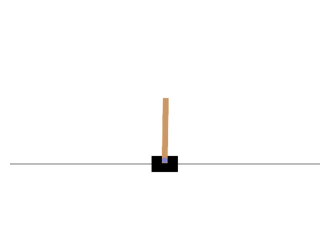

In [83]:
display_frames2video(frames, dpi=100)